<a href="https://www.kaggle.com/code/kaushiksuresh147/dogecoin-vs-shiba-inu-a-dog-fight?scriptVersionId=103971494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="text-align:center;background-color:black;">
<img src="https://bitcoinist.com/wp-content/uploads/2021/11/Shiba-inu-VS-Dogecoin.jpeg" width=800>
</div>

In [1]:
import pandas as pd

import pandas as pd
import numpy as np 
import missingno as mno
import pickle 
import json
import time 
import gc
import random
import sklearn

#For Data Visualization
import matplotlib.pyplot as plt
#%matplotlib inline 
#output of plotting commands is displayed inline within frontends like the Jupyter notebook,
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#NetworkX
import networkx as nx
import plotly.express as px 
import plotly.graph_objects as go #To construct network graphs
from plotly.subplots import make_subplots #To make multiple plots

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from plotly.offline import init_notebook_mode, iplot
from IPython.core.display import display, HTML #To display html content in a code cell
init_notebook_mode(connected=True)

gc.collect()



30

In [2]:
shib=pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/Shiba Inu.csv')
doge=pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/dogecoin.csv')

<div style="text-align:center">
<img src="https://www.altcoinbuzz.io/wp-content/uploads/2021/06/Pratik-AB-BANNERS-50.jpg">
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
            text-align:center">
<br>
<h3><center><b>Shiba Inu token (SHIB)<b></center></h3>
    <br>
<h4>SHIB is a decentralized cryptocurrency created in August 2020 by an anonymous person or group known as "Ryoshi". It is named after the Shiba Inu (柴犬), a Japanese breed of dog originating in the Chūbu region, the same breed that is depicted in Dogecoin's symbol, itself originally a satirical cryptocurrency based on the Doge meme. Shiba Inu has been characterized as a "meme coin" and a pump and dump scheme.There have also been concerns about the concentration of the coin with a single "whale" wallet controlling billions of dollars' worth of the token, and frenzied buying by retail investors motivated by fear of missing out (FOMO).</h4>
<br><br>
<h4>Shiba Inu was created in August 2020, dubbing itself the 'Dogecoin killer'. On 13 May, Vitalik Buterin donated more than 50 trillion SHIB (worth over 1 billion USD at the time) to the India COVID-Crypto Relief Fund.</h4>
<br><br>
<h4>The exchange price of the cryptocurrency notably surged in early October 2021. Its value increased 240% over the week.However, at the beginning of November the price dropped and continued to fall, ending the month having lost approximately 55% of its value.</h4>
<br>
</div>
    


<div style="text-align:center">
<img src="https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/4k5tazc4bl9w051e_1623139763.jpeg">
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
            text-align:center">
<br>
    <h3><center><b>Dogecoin(DOGE)</b></center></h3>
<br>
<h4>Dogecoin(DOGE) is a cryptocurrency created by software engineers Billy Markus and Jackson Palmer, who decided to create a payment system as a "joke", making fun of the wild speculation in cryptocurrencies at the time. It is considered both, the 1st "Meme coin", and more specifically, the 1st "dog coin". Despite its satirical nature, some consider it a legitimate investment prospect. Dogecoin features the face of the Shiba Inu dog from the "Doge" meme as its logo and namesake.It was introduced on December 6, 2013, and quickly developed its own online community, reaching a market capitalization of over 85 billion USD on May 5, 2021.</h4>
<br>
<h4>It is the current shirt sponsor (sleeve only) of Premier League club Watford. Dogecoin.com promotes the currency as the "fun and friendly Internet currency", referencing its origins as a "joke." Software engineers Billy Markus and Jackson Palmer launched the satirical cryptocurrency as a way to make fun of bitcoin and the many other cryptocurrencies boasting grand plans to take over the world. With the help of Reddit, the site became an instant hit. Within two weeks, Dogecoin had established a dedicated blog and forum, and its market value has reached 8 million USD, once jumping to become the seventh largest electronic currency in the world. Dogecoin is based on Scrypt algorithm, and the transaction process is more convenient than Bitcoin. Dogecoin takes only 1 minute to confirm, while BTC takes 10 minutes.</h4>
<br>
</div>

In [3]:
def candle_stick(df,name):
    data=df
    
    fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close']))

    fig.update_layout(template='plotly_dark',
        title='{} Price'.format(name),
        xaxis_title="Date",
        yaxis_title='{} Price'.format(name),title_x=0.5,
        )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="$", showgrid=False
    )

    fig.update_xaxes(
         showgrid=True
    )
    
    low=[data['Open'].min(),data['High'].min(),data['Low'].min(),data['Close'].min()]
    high=[data['Open'].max(),data['High'].max(),data['Low'].max(),data['Close'].max()]
    
    fig.show()
    
    display(HTML('<div style="color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:100%;font-family:Verdana;letter-spacing:0.5px;text-align:center"><p style="padding: 10px;color:white;"><center><b> {} Summary :<center></b></p><br>Median price: {}<br>Mean price: {}<br>Highest price: {}<br>Lowest price: {}<br></div>'.format(name,data['Close'].median(),data['Close'].mean(),max(high),min(low))))



In [4]:
candle_stick(shib,'SHIBA INU')

In [5]:
candle_stick(doge,'Dogecoin')

In [6]:
def mom_growth_rate(final_df,name):
    final_df['Date']=pd.to_datetime(final_df['Date'],format="%Y-%m-%d")
    final_df['Year']=final_df['Date'].dt.year
    final_df['Month']=final_df['Date'].dt.month
    final_df['Coin_name']=name
    year_df=final_df[(final_df['Year']==2021)&(final_df['Month']!=11)]
    group_yr_df=year_df.groupby(['Coin_name','Month']).agg({'Close':np.mean}).reset_index()

    def mom(m1,m2):
        return round(((m2-m1)/m1)*100,2)

    mom_list=[]
    for i in list(group_yr_df['Coin_name'].unique()):
        df=group_yr_df[group_yr_df['Coin_name']==i]
        for j in range(0,len(df)):
            if df['Month'].iloc[j]!=1:
                mom_list.append(mom(df['Close'].iloc[j-1],df['Close'].iloc[j]))
            else:
                mom_list.append(0)

    group_yr_df['mom']=mom_list

    group_yr_df['mom']=round(group_yr_df['mom'],2)
    df2=group_yr_df.pivot_table(index='Coin_name',columns='Month',values='mom')

    def style_negative(v, props=''):
        return props if v < 0 else None
    s2 = df2.style.applymap(style_negative, props='color:red;')\
                  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0) else None)

    def highlight_max(s, props=''):
        return np.where(s == np.nanmax(s.values), props, '')
    s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=1)

    s2.set_caption("Mean Price Month on Month (MOM) Growth rate")\
     .set_table_styles([{
         'selector': 'caption',
         'props': 'caption-side: top; font-size:2.50em;'
     }], overwrite=False)
    
    mon_year=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov']
    fig=px.line(group_yr_df,x='Month',y='mom',color='Coin_name')
    fig.update_layout(template='plotly_dark',
            title='Mean Price Month on Month (MOM) Growth rate -2021',
            xaxis_title="Month in 2021",
            yaxis_title='MoM growth percentage',title_x=0.5,
            )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="%", showgrid=False
    )
    fig.update_xaxes(
         showgrid=True
    )
    fig.show()
    
    return df2



In [7]:
mom_growth_rate(shib,'SHIBA INU')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in double_scalars

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in double_scalars



Month,1,4,5,6,7,8,9,10,12
Coin_name,,,,,,,,,
SHIBA INU,0.0,inf,1381.07,-32.77,-6.61,4.07,-2.96,364.61,6.17


In [8]:
mom_growth_rate(doge,'Dogecoin')

Month,1,2,3,4,5,6,7,8,9,10,12
Coin_name,,,,,,,,,,,
Dogecoin,0.0,343.68,-1.96,244.65,131.88,-31.17,-31.88,29.89,-9.47,2.07,-27.92


In [9]:
def moving_average(df,name,period1,period2):
    #Closing price 
    adj_close_px = df['Close']
    
    df['Rolling 42'] = adj_close_px.rolling(window=period1).mean()
    df['Rolling 252'] = adj_close_px.rolling(window=period2).mean()
    df[['Close', 'Rolling 42', 'Rolling 252']].plot()
    
    plt.title('Moving average of {}'.format(name))
    plt.ylabel('Price')
    
    
    plt.show()
    

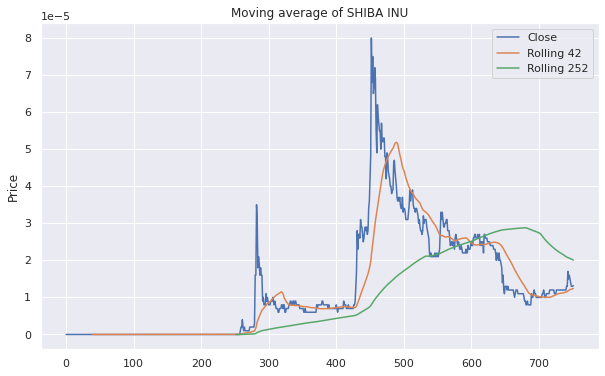

In [10]:
moving_average(shib,'SHIBA INU',40,252)

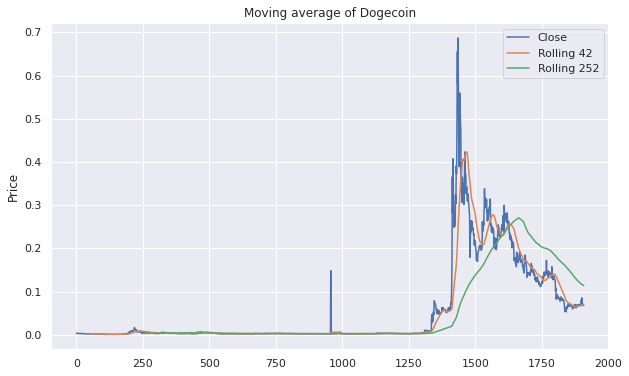

In [11]:
moving_average(doge,'Dogecoin',40,252)

In [12]:
def sma_and_ema(df,name):
    df['SMA5'] = df.Close.rolling(5).mean()
    df['SMA20'] = df.Close.rolling(20).mean()
    df['SMA50'] = df.Close.rolling(50).mean()
    df['SMA200'] = df.Close.rolling(200).mean()
    df['SMA500'] = df.Close.rolling(500).mean()

    fig = go.Figure(data=[go.Ohlc(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'], name = "OHLC"),
                          go.Scatter(x=df.Date, y=df.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                          go.Scatter(x=df.Date, y=df.SMA20, line=dict(color='green', width=1), name="SMA20"),
                          go.Scatter(x=df.Date, y=df.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                          go.Scatter(x=df.Date, y=df.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                          go.Scatter(x=df.Date, y=df.SMA500, line=dict(color='purple', width=1), name="SMA500")])
    
    fig.update_layout(template='plotly_dark',
        xaxis_title='Date',
        yaxis_title='Price',
        title='SMA of {}'.format(name),
        hovermode="x",title_x=0.5
    )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="$", showgrid=True
    )

    fig.update_xaxes(
         showgrid=True
    )
    
    fig.show()


    df['EMA5'] = df.Close.ewm(span=5, adjust=False).mean()
    df['EMA20'] = df.Close.ewm(span=20, adjust=False).mean()
    df['EMA50'] = df.Close.ewm(span=50, adjust=False).mean()
    df['EMA200'] = df.Close.ewm(span=200, adjust=False).mean()
    df['EMA500'] = df.Close.ewm(span=500, adjust=False).mean()

    fig = go.Figure(data=[go.Ohlc(x=df['Date'],
                                  open=df['Open'],
                                  high=df['High'],
                                  low=df['Low'],
                                  close=df['Close'], name = "OHLC"),
                          go.Scatter(x=df.Date, y=df.EMA5, line=dict(color='orange', width=1), name="EMA5"),
                          go.Scatter(x=df.Date, y=df.EMA20, line=dict(color='green', width=1), name="EMA20"),
                          go.Scatter(x=df.Date, y=df.EMA50, line=dict(color='blue', width=1), name="EMA50"),
                          go.Scatter(x=df.Date, y=df.EMA200, line=dict(color='violet', width=1), name="EMA200"),
                          go.Scatter(x=df.Date, y=df.EMA500, line=dict(color='purple', width=1), name="EMA500")])
    fig.update_layout(template='plotly_dark',
        xaxis_title='Date',
        yaxis_title='Price',
        title='EMA of {}'.format(name),
        hovermode="x",title_x=0.5
    )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="$", showgrid=True
    )

    fig.update_xaxes(
         showgrid=True
    )
    
    fig.show()

In [13]:
sma_and_ema(shib,'Shiba Inu')

In [14]:
sma_and_ema(doge,'Dogecoin')

In [15]:
doge_vol=pd.DataFrame(doge[doge['Year']==2021].groupby(['Month']).agg({'Volume':np.mean}).reset_index())
shib_vol=pd.DataFrame(shib[shib['Year']==2021].groupby(['Month']).agg({'Volume':np.mean}).reset_index())

plt_df=doge_vol[['Month','Volume']].merge(shib_vol[['Month','Volume']],on='Month',how='left')[0:-1]
plt_df.rename(columns={'Volume_x':'Dogecoin','Volume_y':'Shiba Inu'},inplace=True)
fig = px.line(plt_df, x='Month', y=['Dogecoin','Shiba Inu'])
fig.update_layout(template='plotly_dark',
    xaxis_title='Month',
    yaxis_title='Mean trading volume',
    title='Mean trading volume of DOGE and SHIB in 2021',
    hovermode="x",title_x=0.5
)
fig.update_yaxes( # the y-axis is in dollars
    tickprefix="$", showgrid=True
)

fig.update_xaxes(
     showgrid=True
)
fig.show()

<div style="text-align:center">
<img src="https://coinquora.com/wp-content/uploads/2021/08/Both-DOGE-and-SHIB-Are-Bullish-How-High-Will-They-Go.jpg">
</div>

<div class='alert alert-info'>
<h4>In 2021, Shiba Inu (SHIB) and Dogecoin (DOGE) exploded onto the cryptocurrency scene. Using the Japanese hunting dog, the Shiba Inu, as their mascots, both cryptocurrencies seemingly came out of nowhere and went on a run that turned some early investors into billionaires. The price of Shiba Inu has climbed more than 50 million percent this year (yes, that's not a typo), while the price of Dogecoin is up more than 3,300%. Which one is the better buy? Let's take a look.</h4>

<div class='alert alert-info'>
<h3><center>The dog tokens look similar, but the differences are key</center><h3>
<ol>
<li>In some respects, there are a lot of similarities between Shiba Inu and Dogecoin. Both cryptocurrencies currently function solely as currencies and speculative investment vehicles, which means they aren't integrated with a blockchain service network in the same way as Ethereum, Solana, and Cardano's respective tokens.<BR>
<br>
<li>Both Shiba Inu and Dogecoin were started partially as spoofs on the cryptocurrency craze, and both went on to post fantastic gains thanks to meme energy and speculative investment frenzy. And, of course, both tokens have the Shiba Inu dog for a mascot.<br>
<br>  
<li>However, there are some notable differentiating points as well. While Dogecoin is modeled after Bitcoin, Shiba Inu is an ERC-20 token built on the Ethereum blockchain. Shiba Inu's Ethereum connection means that the token could eventually have smart contract functionality implemented down the line.<br>
<br>
<li>The two cryptocurrencies' respective approaches to mining and coin supply present additional points of distinction. Rather than allowing new tokens to be mined like Dogecoin, Shiba Inu is actively deflationary, with tokens regularly being burned and taken out of circulation. While SHIB has a greater overall token count, the burning dynamic could help the cryptocurrency's value relative to DOGE.<br>
<br>
<li>Dogecoin currently has a market capitalization of about 23.3 USD billion, while Shiba Inu has a market cap of roughly 18.3 USD billion. However, while Dogecoin has the larger market cap, Shiba Inu's meme energy still seems hotter. Google Trends analysis shows that SHIB is still generating more search interest, and general popularity could be a deciding factor in which token performs better in the future.<br>
<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
            text-align:center">
<br>
    <h3><center><b>More technical indicators coming soon ⏳</b></center></h3>
<br>
</div>

<div class='alert alert-info'>
<center><h4>- If you are interested in Bitcoin, I would suggest you other related resources of mine for you to explore</h4></center>
</div>

* [Bitcoin Volatily Analysis with interactive visualizations](https://www.kaggle.com/kaushiksuresh147/bitcoin-volatility-analysis-with-interactive-viz) 
* [Bitcoin's  price prediction using the facebook prophet model](https://www.kaggle.com/kaushiksuresh147/bitcoin-prices-eda-and-prediction-r2-0-99)
* [Bitcoin Tweets Exploratory data analysis](https://www.kaggle.com/kaushiksuresh147/bitcoin-prices-eda-and-prediction-r2-0-99)
* [Bitcoin Tweets Dataset updated on a weekly basis](https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets)

<div class='alert alert-info'>
<center><h4>- If you would like to know more about cryptocurrency and Blockchain, pls refer to the below notebooks</h4></center>
</div>

* [what, why, where, and how-of-blockchain?](https://www.kaggle.com/kaushiksuresh147/what-why-where-and-how-of-blockchain)
* [What is cryptocurrency?](https://www.kaggle.com/kaushiksuresh147/what-is-cryptocurrency/edit/run/78333005)

<div class='alert alert-info'>
<center><h4>- If you would like to know more about how cryptocurrencies are performing each month, pls refer to the below notebooks</h4></center>
</div>

* [Nov-21 top 10 Crypto's performance update 📈 🧑‍💻](https://www.kaggle.com/kaushiksuresh147/nov-21-top-10-crypto-s-performance-update)
* [Performance analysis of top10 Crypto's in Oct-2021](https://www.kaggle.com/kaushiksuresh147/performance-analysis-of-top10-crypto-s-in-oct-2021)



<div style="text-align:center"><img src="https://static.news.bitcoin.com/wp-content/uploads/2019/10/5aY6rsB5-crypto-learning.jpg" height="300" width="600"></div>


<div class='alert alert-info'>
<center><h3>Other Cryptocurrency related resources</h3></center>

<h4><center> Datasets 📚</center></h4>
</div>

1. [Bitcoin Tweets](https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets)
2. [Top 100 Crytocurrency historical dataset](https://www.kaggle.com/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset)
3. [Ethereum historical dataset](https://www.kaggle.com/kaushiksuresh147/ethereum-cryptocurrency-historical-dataset)
4. [Polygon(Matic) Historical dataset](https://www.kaggle.com/kaushiksuresh147/maticpolygon-crytocurrency-historical-dataset)
5. [Solana Historical dataset](https://www.kaggle.com/kaushiksuresh147/solana-cryptocurrency-historical-dataset)
6. [India wants Crypto movement tweets](https://www.kaggle.com/kaushiksuresh147/india-wants-crypto-tweets)


<div class='alert alert-info'>
<h4><center>Notebooks 📓</center></h4>
</div>

    
1. [Bitcoin EDA AND Prediction](https://www.kaggle.com/kaushiksuresh147/bitcoin-prices-eda-and-prediction-r2-0-99)
2. [People reaction on India proposed Crypto ban](https://www.kaggle.com/kaushiksuresh147/people-s-reaction-on-india-s-proposed-crypto-ban)
3. [Ethereum EDA and Prediction using Facebook prophet](https://www.kaggle.com/kaushiksuresh147/ethereum-eda-and-prediction-using-prophet)
4. [Dogecoin EDA and prediction ](https://www.kaggle.com/kaushiksuresh147/doge-coin-to-moon-eda-and-prediction)
5. [what, why, where, and how-of-blockchain?](https://www.kaggle.com/kaushiksuresh147/what-why-where-and-how-of-blockchain)



<div class='alert alert-info'>

<h4><center>Disclaimer:</center></h4>
    
Please note, the aim of the notebook is not to provide investment advice and solely for educational purposes only. I would request you to do your own research, technical analysis, and fundamental analysis  before investing.
<br>
    
Do remember that, <b><h4><center>High return comes with High risk! So, beaware of the risks</center></h4></b>
</div>

<div class='alert alert-warning'>
    <h4><center>References:</center></h4>

<ol>
<li>https://www.kaggle.com/kalilurrahman/g-res-crypto-eda-and-forecast#-8-BackTesting-Trading-Strategy--(for-Bit-coin)-
<li>https://www.analyticsinsight.net/doge-vs-shiba-inu-where-to-invest-in-2021/
<li>  https://www.fool.com/investing/2021/12/17/better-buy-shiba-inu-or-dogecoin/
    </div>